In [132]:
# Library importation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
# Data importation
data=pd.read_csv('data/data.csv')

In [134]:
# Calculate the mean
def getMean(vrbl):
    return 1/len(vrbl)*sum(vrbl)
# we can use numpy to calculate avg :
    # np.mean(....)


In [135]:
# Calculate variance
def getVar(vrbl):
    return 1/len(vrbl)*sum(vrbl*vrbl)-(getMean(vrbl)*getMean(vrbl))
# we can use numpy to calculate variance :
    # np.var(....)


In [136]:
# Get xi , yi
xi=data.iloc[:,0]
yi=data.iloc[:,1]


In [137]:
# Calculate Covariance
def getCov(xi,yi):
    return 1/len(xi)*sum(xi*yi)-getMean(xi)*getMean(yi)
# we can use numpy to calculate Covariance :
    # np.cov(xi, yi, ddof=0)[0,1]

In [138]:
# Calculate the linear regression coefficient :  y = alpha * x + beta
def getAlpha(xi,yi):
    return getCov(xi,yi)/getVar(xi)
# we can use numpy to calculate alpha :
    # np.polyfit(xi, yi, deg=1)[0]


In [139]:
# Calculate the slope (or beta or la pente)
def getPente(xi, yi):
    return getMean(yi)-getAlpha(xi, yi)*getMean(xi)
# we can use numpy to calculate alpha :
    # np.polyfit(xi, yi, deg=1)[1]


In [140]:
# Calculate the predicted values of y
def getPredictedValue(xi,yi):
    return getAlpha(xi, yi)*xi+getPente(xi, yi)


# we can use numpy to calculate alpha :
    # calculate coefficients of linear regression model
        #coefficients = np.polyfit(x, y, 1)
    # calculate predicted y-values based on linear regression model
        #y_pred = np.polyval(coefficients, x)


In [141]:
# Draw using plot
def getDrawPlt(xi,yi,clr):
    plt.plot(xi,yi,'.')
    plt.plot(xi, getPredictedValue(xi, yi), color=clr)
    plt.xlabel("temperature")
    plt.ylabel("rendemment")
    plt.show()

In [142]:
#  Calculate the correlation coefficient
def getCoefCorrelation(xi,yi):
    return getCov(xi,yi)/(np.sqrt(getVar(xi))*np.sqrt(getVar(yi)))

# we can use numpy to calculate alpha :
    # corr_matrix = np.corrcoef(xi, yi) # calculate correlation matrix 
    # corr_coef = corr_matrix[0, 1]     # get coef from corr_matrix


In [143]:
#  Calculate the determination coefficient (R-squared)
def getCoefDetermination(xi,yi):
    return getCoefCorrelation(xi,yi)**2

In [144]:
# Interpretation of R-squared
getCoefDetermination(xi,yi)
# Interpretation of R-squared = 0.996 in this case : 
    # 0.996 means that 99.6% of the variation
    # in the dependent variable (yi) can be explained by the independent variable (xi)
    # in the linear regression model. This indicates a strong positive linear relationship between the two variables.


0.9962609376200801

In [145]:
# Adding points to the existing DATA
point1=pd.Series([105,180])
point2 = pd.Series([70, 70])
x2=pd.concat([xi, point1],ignore_index=True)
y2=pd.concat([yi, point2], ignore_index=True)

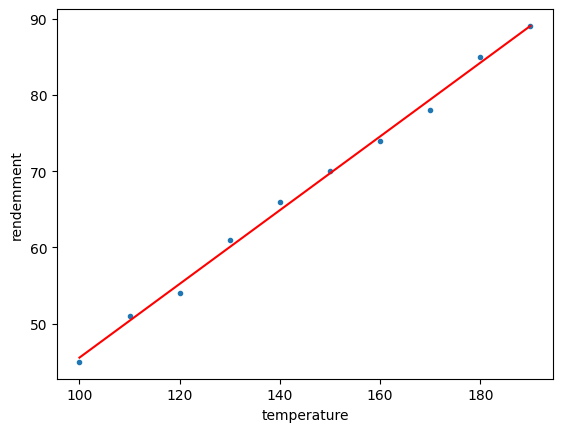

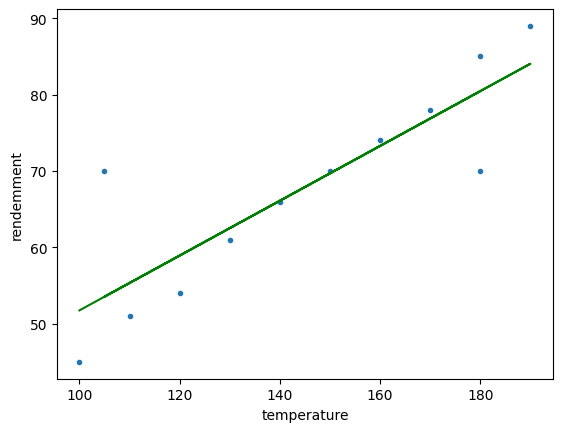

In [146]:
# Data visualization
getDrawPlt(xi,yi,'r')
getDrawPlt(x2,y2,'g')

In [147]:
# Calculate the sum of squared errors between the observed y-values (yi) and the predicted y-values
def getError(xi,yi):
    return sum(np.square(yi-getPredictedValue(xi,yi)))

In [148]:
print(getError(xi,yi))

7.224242424242385
